In [1]:
import sys
#Indicate operating environment and import core modules
# location_input = input("what computer are you on? a = Bens, b = gpucluster, c = other   ")
# location_dict = {'a': "C:\\Users\Ben\Documents\GitHub\expression_broad_data", 'b': "/home/heineike/github/expression_broad_data/",'c':'you need to add your location to the location_dict'}
# data_processing_dir = location_dict[location_input]
# print("base directory is " + base_dir)
base_dir = "C:\\Users\\heine\\github\\expression_broad_data"

if sys.path[-1] != base_dir:
    sys.path.append(base_dir)
    print("Added " + base_dir + " to path: " )
    print(sys.path)
import os

print("I am about to import a library")
from core import expression_plots 
from core import io_library 

data_processing_dir = base_dir + os.path.normpath("\expression_data") + os.sep

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pickle
import subprocess
from collections import Counter
import scipy.stats as stats
from itertools import chain
#this only works if you are online
online_input = input("are you online? Yes/No")
if online_input == "Yes": 
    import plotly.plotly as py
    py.sign_in('heineike02', 'APPjKrtARaN2ZgUYIkqr')

Added C:\Users\heine\github\expression_broad_data to path: 
['', 'C:\\Users\\heine\\AppData\\Local\\Enthought\\Canopy\\edm\\envs\\bmh_python35_ts\\python35.zip', 'C:\\Users\\heine\\AppData\\Local\\Enthought\\Canopy\\edm\\envs\\bmh_python35_ts\\DLLs', 'C:\\Users\\heine\\AppData\\Local\\Enthought\\Canopy\\edm\\envs\\bmh_python35_ts\\lib', 'C:\\Users\\heine\\AppData\\Local\\Enthought\\Canopy\\edm\\envs\\bmh_python35_ts', 'C:\\Users\\heine\\AppData\\Local\\Enthought\\Canopy\\edm\\envs\\bmh_python35_ts\\lib\\site-packages', 'C:\\Users\\heine\\AppData\\Local\\Enthought\\Canopy\\edm\\envs\\bmh_python35_ts\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\heine\\.ipython', 'C:\\Users\\heine\\github\\expression_broad_data']
I am about to import a library
I am importing io_library
C:\Users\heine\github\expression_broad_data\expression_data
are you online? Yes/NoYes


In [2]:
%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
#%matplotlib inline
%matplotlib notebook

# Cross species raw expression comparison
Compare raw expression across species both before (WT+ drug) and after (AS+ drug) stress in both species. 

In [3]:
#Import deseq data, averaged rlog data, and averaged raw data

lfc_data = {}
rlog_data = {}
raw_data = {}
comparison_data = {}

species = ['KL', 'SC']
conditions = ["AS_noNMPP1_YPD_t40", "AS_yesNMPP1_YPD_t40"]
for spec in species: 
    lfc_data_spec = pd.read_csv(data_processing_dir + os.path.normpath("20170817_klscpka/20170817_klscpka_DESEQ_YPD_t40_AsMinvAsPlus_" + spec + ".csv"))
    lfc_data_spec.rename(index=str, columns={"Unnamed: 0": spec.lower() + "_genename"}, inplace = True)
    lfc_data_spec.set_index(spec.lower() + '_genename', inplace = True)
    if spec == 'KL':
        io_library.kl_genename_convert(lfc_data_spec)  
    lfc_data[spec] = lfc_data_spec
    
    fname_rlog_data = data_processing_dir + '20170817_klscpka/20170817_klscpka_avg_rlog_' + spec + '.csv'
    rlog_data[spec] = pd.read_csv(fname_rlog_data,index_col = 0)
    fname_raw_data = data_processing_dir + '20170817_klscpka/20170817_klscpka_avg_counts_' + spec + '.csv'
    raw_data[spec] = pd.read_csv(fname_raw_data,index_col = 0)
    
    #These are the genes that have no rlog value
    print('The following ' + str(len(set(lfc_data[spec].index)-set(rlog_data[spec].index))) + ' genes have no rlog data for ' + spec)
    print(set(lfc_data[spec].index)-set(rlog_data[spec].index))

    #Merge into one dataset
    labels_mean = [condition + "_mean" for condition in conditions]
    labels_var = [condition + "_var" for condition in conditions]
    labels = list(chain.from_iterable([labels_mean,labels_var]))
    
    rlog_subset = rlog_data[spec].loc[:,labels]
    rlog_subset.rename(index = str, columns = {label: 'rlog_' + label for label in labels},inplace=True)
    
    raw_subset = raw_data[spec].loc[:,labels]
    raw_subset.rename(index = str, columns = {label: 'raw_' + label for label in labels},inplace=True)
      
    comparison_data[spec] = pd.concat([lfc_data[spec], rlog_subset , raw_subset],axis = 1)

    
# save data to pass on to other analyses
with open(data_processing_dir + os.path.normpath("20170817_klscpka/ASminus_ASplus_YPD_comparison.pkl"), 'wb') as pkl_out:
    pickle.dump(comparison_data, pkl_out)




The following 131 genes have no rlog data for KL
{'EBG00000981996', 'KLLA0D17633r', 'KLLA0D00269g', 'EBG00000982262', 'EBG00000981568', 'EBG00000981654', 'KLLA0B10758r', 'KLLA0D17732g', 'KLLA0D00157g', 'EBG00000981669', 'EBG00000981876', 'EBG00000981868', 'EBG00000981899', 'EBG00000982280', 'EBG00000982030', 'KLLA0D15785r', 'EBG00000982023', 'EBG00000981618', 'EBG00000981922', 'KLLA0D17924r', 'KLLA0A07051g', 'EBG00000982213', 'EBG00000982087', 'KLLA0F25344r', 'EBG00000982049', 'KLLA0D17935r', 'EBG00000982204', 'KLLA0D09372r', 'EBG00000981968', 'EBG00000981859', 'EBG00000981549', 'EBG00000981990', 'KLLA0C04752g', 'EBG00000982111', 'EBG00000981937', 'EBG00000981895', 'KLLA0E14873r', 'EBG00000981740', 'EBG00000982094', 'KLLA0D06336r', 'EBG00000981614', 'KLLA0D17894r', 'EBG00000982073', 'EBG00000982118', 'KLLA0D00275g', 'EBG00000981804', 'EBG00000982183', 'KLLA0E23805g', 'EBG00000982092', 'KLLA0C00352g', 'EBG00000982313', 'KLLA0D17864g', 'EBG00000982121', 'EBG00000981545', 'EBG00000982165'

In [5]:
#Load comparison data
#WT plus, AS plus 
#fname_comparison_data = "20170817_klscpka/WTplus_ASplus_comparison.pkl"

#YPD data
fname_comparison_data = "20170817_klscpka/ASminus_ASplus_YPD_comparison.pkl"
with open(data_processing_dir + os.path.normpath(fname_comparison_data), 'rb') as pkl_in:
     comparison_data = pickle.load(pkl_in)

In [6]:
#Load KL to SC ortholog mapping

kl_orthologs = pd.read_pickle(data_processing_dir + "ortholog_files_YGOB/kl_orthologs.pkl")


In [11]:
#Map KL PKA inhibition data onto related SC orthologs
#First change column name for kl_nmpp1_lfc data to match ortholog table for merge. 
#kl_nmpp1_lfc_renamed = pmNmpp1_SDC_t40_lfc['KL'].copy()
#kl_nmpp1_lfc_renamed.columns = ['kl_genename'] + list(pmNmpp1_SDC_t40_lfc['KL'].columns[1:])
kl_comparison_data = comparison_data['KL']
kl_comparison_data['kl_genename']=kl_comparison_data.index
kl_comparison_data_sc_orthologs = pd.merge(kl_orthologs, kl_comparison_data, on = 'kl_genename', how = 'inner')
kl_comparison_data_sc_orthologs

#add in SC_common_name and SC_common name
sc_comparison_data=comparison_data['SC']
sc_comparison_data.index.rename('sc_genename',inplace = True)
sc_genenames = sc_comparison_data.index
sc_commonnames = io_library.SC_common_name_lookup(sc_genenames)
sc_comparison_data['SC_common_name']= sc_commonnames
#Just noticed that IMP2 has a common name IMP2' - should troubleshoot that someday. 

kl_sc_PKA_data = kl_comparison_data_sc_orthologs.join(sc_comparison_data, on = 'sc_genename',lsuffix = '_KL',rsuffix = '_SC')

fname_cross_spec_comparison = data_processing_dir + os.path.normpath("20170817_klscpka/cross_species_compare_ASminus_ASplus_YPD.csv")
kl_sc_PKA_data.to_csv(fname_cross_spec_comparison)

In [13]:
#Load cross species comparison data

#YPD data
fname_cross_spec_comparison = data_processing_dir + os.path.normpath("20170817_klscpka/cross_species_compare_ASminus_ASplus_YPD.csv")
kl_sc_PKA_data = pd.read_csv(fname_cross_spec_comparison, index_col=0)
kl_sc_PKA_data
# with open(fname_cross_spec_comparison, 'rb') as pkl_in:
#      comparison_data = pickle.load(pkl_in)

,N SCer Orthologs,kl_genename,sc_genename,baseMean_KL,log2FoldChange_KL,lfcSE_KL,stat_KL,pvalue_KL,padj_KL,rlog_AS_noNMPP1_YPD_t40_mean_KL,...,padj_SC,rlog_AS_noNMPP1_YPD_t40_mean_SC,rlog_AS_yesNMPP1_YPD_t40_mean_SC,rlog_AS_noNMPP1_YPD_t40_var_SC,rlog_AS_yesNMPP1_YPD_t40_var_SC,raw_AS_noNMPP1_YPD_t40_mean_SC,raw_AS_yesNMPP1_YPD_t40_mean_SC,raw_AS_noNMPP1_YPD_t40_var_SC,raw_AS_yesNMPP1_YPD_t40_var_SC,SC_common_name
0,1,KLLA0E08273g,YIL093C,307.097324,-3.117319,0.391869,-7.955013,1.791132e-15,2.616525e-14,8.023578,...,7.999032e-01,5.864384,6.012012,0.102512,0.153527,1.795921,1.975034,0.026258,0.019171,RSM25
1,1,KLLA0E02179g,YNL323W,596.750877,-0.487211,0.413954,-1.176970,2.392077e-01,3.662996e-01,8.748092,...,8.144010e-01,6.841067,6.690319,1.983754,1.266548,2.075730,2.146700,0.219432,0.176372,LEM3
2,1,KLLA0F12056g,YKR076W,721.339292,5.725890,0.404135,14.168246,1.440529e-45,4.800564e-43,5.529407,...,7.773336e-48,4.965655,8.642741,0.007693,0.014076,1.384101,2.853356,0.005008,0.001150,ECM4
3,1,KLLA0E19691g,YDL174C,32.292002,-0.704536,0.665985,-1.057885,2.901077e-01,4.257787e-01,4.606895,...,1.003400e-10,8.842651,10.535558,0.078743,0.013612,2.609322,3.352513,0.022757,0.002677,DLD1
4,1,KLLA0F20273g,YOR163W,373.122032,0.991374,0.372431,2.661898,7.770147e-03,2.074633e-02,7.353489,...,5.395452e-08,7.264692,8.645844,0.001013,0.063187,2.172017,2.797982,0.001943,0.009904,DDP1
5,1,KLLA0D06127g,YOR246C,300.550233,-0.868219,0.396272,-2.190966,2.845426e-02,6.324328e-02,7.852620,...,5.789574e-07,8.839137,7.382572,0.069640,0.105390,2.717814,2.313137,0.019736,0.016472,ENV9
6,1,KLLA0E07063g,YOL137W,1070.413296,-0.255403,0.442553,-0.577113,5.638634e-01,6.923888e-01,9.647924,...,2.203476e-01,7.471431,7.053748,0.146176,0.083442,2.273729,2.246661,0.008723,0.014864,BSC6
7,1,KLLA0F04499g,YNL067W,938.472171,-4.275055,0.414509,-10.313529,6.121162e-25,2.190472e-23,9.664893,...,1.370800e-11,10.372920,8.550739,0.148571,0.018560,3.156162,2.610781,0.008638,0.004957,RPL9B
8,1,KLLA0C15257g,YDR237W,1161.638190,-2.706933,0.385808,-7.016270,2.278691e-12,2.454541e-11,9.964306,...,7.555303e-01,8.014269,8.158493,0.047859,0.077205,2.434586,2.612835,0.015225,0.008768,MRPL7
9,1,KLLA0E08867g,YNL015W,2927.423587,4.691308,0.454999,10.310592,6.311116e-25,2.243391e-23,7.896321,...,3.481628e-18,3.787630,7.135544,0.127834,0.293084,0.997871,2.378694,0.029605,0.032591,PBI2


In [25]:
#Lookup by SC common name
#Lookup by SC common name
# column_subset = ['N SCer Orthologs', 'kl_genename', 'sc_genename', 'baseMean_KL',
#        'log2FoldChange_KL', 'pvalue_KL', 'padj_KL',
#        'rlog_WT_yesNMPP1_SDC_t40_mean_KL', 'rlog_AS_yesNMPP1_SDC_t40_mean_KL',
#        'raw_WT_yesNMPP1_SDC_t40_mean_KL', 'raw_AS_yesNMPP1_SDC_t40_mean_KL',
#        'baseMean_SC', 'log2FoldChange_SC', 'pvalue_SC',
#        'padj_SC', 'rlog_WT_yesNMPP1_SDC_t40_mean_SC',
#        'rlog_AS_yesNMPP1_SDC_t40_mean_SC', 
#        'raw_WT_yesNMPP1_SDC_t40_mean_SC',
#        'raw_AS_yesNMPP1_SDC_t40_mean_SC','SC_common_name']

#YPD
column_subset = ['N SCer Orthologs', 'kl_genename', 'sc_genename', 'baseMean_KL',
       'log2FoldChange_KL', 'pvalue_KL', 'padj_KL',
       'rlog_AS_noNMPP1_YPD_t40_mean_KL', 'rlog_AS_yesNMPP1_YPD_t40_mean_KL',
       'raw_AS_noNMPP1_YPD_t40_mean_KL', 'raw_AS_yesNMPP1_YPD_t40_mean_KL',
       'baseMean_SC', 'log2FoldChange_SC', 'pvalue_SC','padj_SC', 
       'rlog_AS_noNMPP1_YPD_t40_mean_SC', 'rlog_AS_yesNMPP1_YPD_t40_mean_SC', 
       'raw_AS_noNMPP1_YPD_t40_mean_SC', 'raw_AS_yesNMPP1_YPD_t40_mean_SC',
       'SC_common_name']

In [40]:



jso_msn2_targets = ['SSA1', 'SSA4', 'HSP104', 'CTT1', 'TPK1', 'TFS1', 'DDR2', 'TSA1', 'HSP12', 'TMA10', 'TPS2', 'RTC3', 'GPH1', 'HXK1', 'TSA2', 'CYC7', 'PNC1', 'GSY1', 'FMP48', 'SS13', 'ALD4', 'YNR014W', 'HOR2', 'YOR173W', 'RAS2', 'GLK1', 'GPD1', 'HSP26', 'SIP18', 'TKL2', 'FMP16', 'ALD3', 'PGM2']
mitochondrial_translation = ['MRP21','MRPL3','MRPL38','MRPS9','SWS2','MRPL4','RSM23','MSS51','MRPL28','MRPL27','MRPS8']
#common_name_query = ['HXK1','HXK2','GLK1','EMI2','HXT5','HXT3','CYC7','CYC1','YJL045W','SDH1','SHH4','SDH4','STL1']  #,'YJL045W','HXT3','HXT5','SHH4','STL1', 'CYC7',
common_name_query = ['ADE1', 'ADE2','ADE3','ADE4','ADE6','ADE8','ADE12','ADE13','ADE16','ADE17']
#['ZWF1','RPE1','TAL1','RKI1']
#['HUL4','UBC5','UBC8','UBI4','UBP15','BMH2','ARC18','HSP42','YAK1','BCY1','PDE1','PDE2','TPK1','TPK2','TPK3','TOR1','CIT1','ZWF1']
#['TPK3','TPK2','TPK1','MIG1','MIG2','MIG3','CAT8','HAP2','HAP4','HAP5','SIP2','TUP1','CYC8']#['VPS8','PEP1','VPS15','VID24','CCZ1','ARL1','APM3'] #protein targeting to vacuole #['FMP45','SWF1','SUR7','YNL194C','SCD5']#['CAR1','CAR2']#['DEP1', 'FYV10','GID7','GID8','IGD1','NUP2','PCL10','PCL8','PHO85','PSK2','RMD5','UBC8','UBP14','UME6','VID24','VID28','VID30','YTR066C']# ['CTT1']  #['SSA1', 'SSA2','AHA1','BTN2', 'CPR6','CUR1','FES1','HCH1','HSC82','HSP42','HSP104','HSP78','HSP82','MBF1','MDJ1','SIS1','STI1','YDJ1']
kl_sc_PKA_data[kl_sc_PKA_data['SC_common_name'].isin(common_name_query)].sort_values(by='log2FoldChange_SC').loc[:,column_subset]


,N SCer Orthologs,kl_genename,sc_genename,baseMean_KL,log2FoldChange_KL,pvalue_KL,padj_KL,rlog_AS_noNMPP1_YPD_t40_mean_KL,rlog_AS_yesNMPP1_YPD_t40_mean_KL,raw_AS_noNMPP1_YPD_t40_mean_KL,raw_AS_yesNMPP1_YPD_t40_mean_KL,baseMean_SC,log2FoldChange_SC,pvalue_SC,padj_SC,rlog_AS_noNMPP1_YPD_t40_mean_SC,rlog_AS_yesNMPP1_YPD_t40_mean_SC,raw_AS_noNMPP1_YPD_t40_mean_SC,raw_AS_yesNMPP1_YPD_t40_mean_SC,SC_common_name
3902,1,KLLA0B08063g,YGR061C,1969.491982,-1.497500,1.746721e-04,6.858261e-04,10.658983,9.534656,3.273317,2.920511,3601.244213,-2.346445,1.815184e-17,1.997649e-16,11.877212,9.960526,3.626368,3.051312,ADE6
1527,1,KLLA0A10109g,YMR300C,847.585555,-3.251639,2.647236e-11,2.571050e-10,9.456404,7.043244,2.982553,2.108900,274.396265,-2.096822,6.022684e-13,5.034550e-12,8.127527,6.437965,2.497016,2.000174,ADE4
189,1,KLLA0D19426g,YNL220W,2394.152435,-1.288366,1.666929e-03,5.309476e-03,10.883059,9.881978,3.344576,3.043859,1688.761942,-0.981197,4.883485e-04,1.645511e-03,10.516581,9.723200,3.196272,3.034037,ADE12
2472,1,KLLA0C04235g,YAR015W,457.053719,0.156095,7.085355e-01,8.067288e-01,7.970146,8.063978,2.448827,2.588183,420.173987,-0.800583,7.646795e-03,1.976046e-02,8.502339,7.891066,2.568644,2.470378,ADE1
4957,2,KLLA0F17655g,YMR120C,7021.285905,0.219556,5.740822e-01,7.011224e-01,12.056835,12.192780,3.625314,3.782504,128.583581,-0.736663,8.664860e-02,1.609370e-01,6.767290,6.237395,2.030562,1.958383,ADE17
2641,1,KLLA0B13189g,YLR359W,1076.518212,-1.929107,4.914442e-08,3.325356e-07,9.857155,8.435803,3.043019,2.567803,205.403582,-0.717488,1.135550e-01,2.016772e-01,7.401067,6.850591,2.228377,2.149030,ADE13
3003,1,KLLA0E16545g,YGR204W,1529.742407,-0.271513,4.136696e-01,5.536362e-01,9.881960,9.674222,3.037068,3.057903,3472.852371,-0.595506,2.960622e-02,6.489372e-02,11.425243,10.944741,3.467938,3.420115,ADE3
799,1,KLLA0A02211g,YDR408C,787.163142,-0.452432,1.856149e-01,3.011865e-01,8.999511,8.655549,2.772707,2.738901,417.036526,-0.582149,5.212685e-02,1.047789e-01,8.364388,7.906070,2.544338,2.503430,ADE8
1454,1,KLLA0E02685g,YOR128C,623.127419,-0.421223,2.377175e-01,3.645411e-01,8.660288,8.344115,2.666526,2.642271,493.603141,0.142853,7.171530e-01,8.282432e-01,8.289068,8.475769,2.493653,2.688484,ADE2
4956,2,KLLA0F17655g,YLR028C,7021.285905,0.219556,5.740822e-01,7.011224e-01,12.056835,12.192780,3.625314,3.782504,6089.885304,1.676134,1.553017e-06,7.600537e-06,10.993870,12.380249,3.305568,3.931896,ADE16


<IPython.core.display.Javascript object>


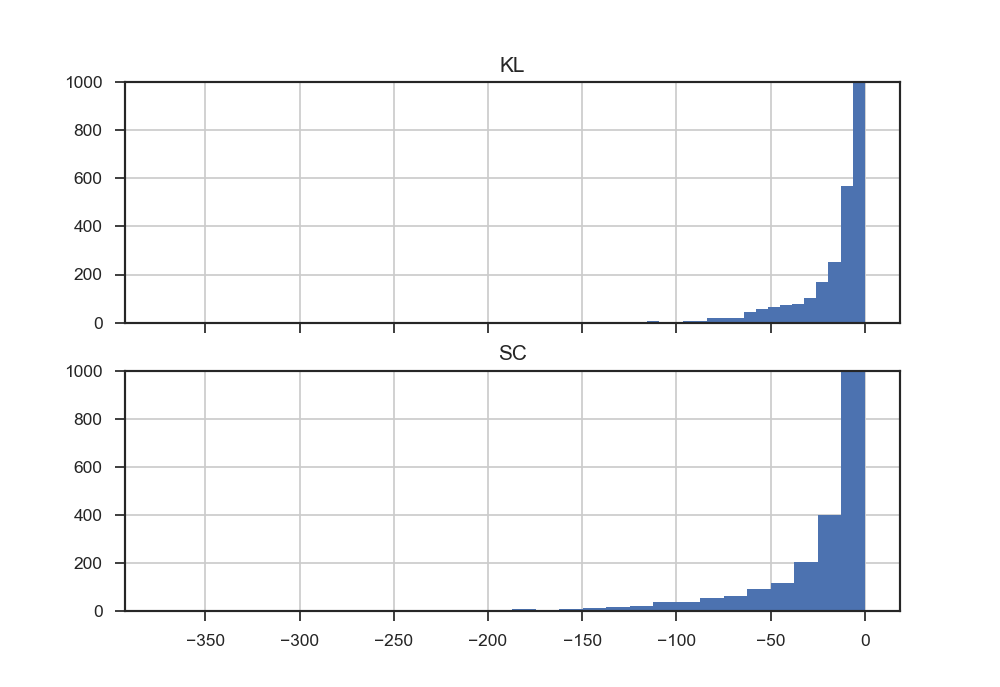

In [58]:
bins = 30 
#Histogram of padj for KL and SC
fig, axarr = plt.subplots(2,1,sharex = True)
ax1 = axarr[0]
np.log(kl_sc_PKA_data['padj_KL']).hist(ax = ax1, bins = bins)
ax1.set_title('KL')
ax1.set_ybound([0,1000])
ax2 = axarr[1]
np.log(kl_sc_PKA_data['padj_SC']).hist(ax = ax2, bins = bins)
ax2.set_title('SC')
ax2.set_ybound([0,1000])
#plt.scatter(kl_sc_PKA_data['rlog_AS_yesNMPP1_SDC_t40_mean_KL'],kl_sc_PKA_data['rlog_AS_yesNMPP1_SDC_t40_mean_SC'], marker = 'o', alpha = 0.3)
#Plotly scatter of KL and SC - color by padj


In [17]:
#Make fold change subsets: 
#was 7 before
pthreshold_KL = 10e-7
pthreshold_SC = 10e-7

gene_set_dict = io_library.make_foldchange_subsets(kl_sc_PKA_data, pthreshold_KL, pthreshold_SC) 


#visualize my various quadrants for raw pre activation, raw activated and fold change plots.

At an adjusted pvalue threshold of 1.00E-10 for K.Lac and 1.00E-17 for S.Cer, there are 295 genes significant for both species, 271 genes significant for KL only, 200 genes significant for SC only, and 4210 unsignificant genes
Genes that are up in S.Cer and Down in K.Lac
[]
Genes that are up in K.Lac and Down in S.Cer
[]


In [31]:
gene_set_dict.keys()

dict_keys(['klsig_rep', 'klscunsig', 'scsig_act', 'scsig_rep', 'klsig_act', 'klscsig_act', 'klscsig_rep'])

In [30]:
#Set up go term list and database: 
GO_aspect = 'P'
#The three GO_aspect are: 
#C = cellular_component
#F = molecular_function
#P = biological_process


go_slims = pd.read_table(data_processing_dir + os.path.normpath('go_terms/go_slim_mapping.tab'),header = None)
go_slims.columns = ['sc_genename','sc_common_name','sgd_ID','GO_aspect','GO_term','GO_term_ID','feature_type']

go_slims_aspect = go_slims[go_slims['GO_aspect']==GO_aspect]
go_term_list = list(set(go_slims_aspect['GO_term']))

In [65]:
terms_of_interest = ["lipid metabolic process","biological_process","conjugation","response to chemical",
                     "sporulation","endosomal transport","lipid transport","response to oxidative stress",
                     "cellular respiration","cofactor metabolic process","carbohydrate transport",
                     "mitochondrial translation", "mitochondrion organization","translational initiation",
                     "cellular amino acid metabolic process", "cell budding",
                     "nucleobase containing small molecule metabolic process", "snoRNA processing", "amino acid transport"]

term_df_dict = {}
for term in terms_of_interest:
    term_genes = list(go_slims_aspect[go_slims_aspect['GO_term']==term]['sc_genename'])
    kl_sc_PKA_data_term = kl_sc_PKA_data[kl_sc_PKA_data['sc_genename'].isin(term_genes)]
    term_df_dict[term]=kl_sc_PKA_data_term

lfc_df_dict = {}
for key in gene_set_dict.keys():
    kl_sc_PKA_data_subset = kl_sc_PKA_data[kl_sc_PKA_data['sc_genename'].isin(gene_set_dict[key])]
    lfc_df_dict[key] = kl_sc_PKA_data_subset

condition_set = {}
for df_dict in (term_df_dict,lfc_df_dict): 
     condition_set.update(df_dict)


In [67]:
#Make plotly plots for fold change and rlog mean values before and after drug highlighting significant genes and go terms. 

for readout in ['log2FoldChange','rlog_AS_noNMPP1_YPD_t40_mean', 'rlog_AS_yesNMPP1_YPD_t40_mean']:
    fig_data = [
            {
                'x': condition_set[condition][readout +'_KL'], 
                'y': condition_set[condition][readout + '_SC'], 
                'text': condition_set[condition]['SC_common_name'], 
                'mode': 'markers', 
                'name': condition} for condition in condition_set.keys()]
    fig = {
        'data': fig_data,
        'layout': {
            'xaxis': {'title': 'KL ' + readout},
            'yaxis': {'title': 'SC ' + readout}
        }
    }

    # IPython notebook
    # py.iplot(fig, filename='pandas/multiple-scatter')

    py.iplot(fig, filename='sc_kl_scatter_YPD_'+readout)

In [ ]:
# meme stuff
#Get a list of promoters and check for enrichment using meme

## build subset for JSO Msn2 targets
# jso_msn2_targets = ['SSA1', 'SSA4', 'HSP104', 'CTT1', 'TPK1', 'TFS1', 'DDR2', 'TSA1', 'HSP12', 'TMA10', 'TPS2', 'RTC3', 'GPH1', 'HXK1', 'TSA2', 'CYC7', 'PNC1', 'GSY1', 'FMP48', 'SS13', 'ALD4', 'YNR014W', 'HOR2', 'YOR173W', 'RAS2', 'GLK1', 'GPD1', 'HSP26', 'SIP18', 'TKL2', 'FMP16', 'ALD3', 'PGM2']
# jso_msn2_targets_kl_orth = list(kl_sc_PKA_data[kl_sc_PKA_data['SC_common_name'].isin(jso_msn2_targets)]['kl_genename'])

#Function that takes a species name, an input set of genenames, and an input control set of genenames and provides AME outut
#it also generates files containing the promoters at the same time. 


spec = 'SC'
#generates target and control gene lists from kl_sc_PKA_data.  Since there are 2 to 1 orthologs mapping from SC to KL KL lists
#need to have duplicates removed i.e. list(set(<gene_list>))
target_gene_list = list(set(kl_sc_PKA_data_klsig[kl_sc_PKA_data_klsig['PKA(AS)+1NMPP1_SC']>0.1]['sc_genename']))
control_gene_list = list(set(kl_sc_PKA_data['sc_genename']))
target_fname_prefix = 'sc_act_sig10e-5'
control_fname_prefix = 'sc_all_withorth'
motif = {'name': 'Jaspar_core_2016', 'fname': 'motifs/JASPAR_CORE_2016_fungi.meme' }

#optional inputs
promoter_dir = {'KL': data_processing_dir+'kl_promoters/' , 'SC': data_processing_dir + 'sc_promoters/'}
promoter_fname = {'KL': 'kl_promoters.pkl', 'SC': 'sc_promoters.pkl'}
ame_scoring = 'totalhits'
ame_method = 'fisher'
ame_pvalue_threshold = '0.05'


#extract promoters
promoters = pd.read_pickle(promoter_dir[spec] + promoter_fname[spec]) 
target_promoters = promoters.loc[target_gene_list,]
control_promoters = promoters.loc[control_gene_list,]  #for control using just promoters which have orthologs - but should I use all promoters? 


fname_prefixes = {'target':target_fname_prefix, 'control': control_fname_prefix}
promoter_lists = {'target':target_promoters, 'control': control_promoters}

for gene_set in ['target','control']:
    fname = promoter_dir[spec] + 'promoter_sets/' + fname_prefixes[gene_set] + '_promoters.fasta'
    with open(fname,'w') as f:
        for row in promoter_lists[gene_set].itertuples():
            if isinstance(row.prom_seq,str):
                header_line = '>' + row.Index + ' 700bp_upstream\n'
                seq_line = row.prom_seq + '\n'
                f.write(header_line)
                f.write(seq_line)
            else:
                print(row.Index + ' in ' + gene_set + ' set promoter value is not a string : ' + str(row.prom_seq)+ '. Skipping for promoter file.')


#Use subprocess to run meme commands: 

#ame --verbose 1 --oc . --control all_kl_promoters.fasta --bgformat 1 --scoring avg --method ranksum --pvalue-report-threshold 0.05 mito_promoters_kl.fasta db/JASPAR/JASPAR_CORE_2016_fungi.meme
motif_db = promoter_dir[spec]+ motif['fname']
target_sequences = promoter_dir[spec] + 'promoter_sets/' + fname_prefixes['target'] + '_promoters.fasta'
control_sequences = promoter_dir[spec] + 'promoter_sets/' + fname_prefixes['control'] + '_promoters.fasta'
output_dir = promoter_dir[spec] + 'ame_output'
file_prefix = target_fname_prefix + '_vs_' + control_fname_prefix + '_motif_' + motif['name'] + '_pVal_' + ame_pvalue_threshold


ame_command = [ "/home/kieran/meme/bin/ame",
              "--verbose", "2",
              "--oc", output_dir,
              "--control", control_sequences,
              "--bgformat", "1", 
              "--scoring", ame_scoring,
              "--method", ame_method, 
              "--pvalue-report-threshold", ame_pvalue_threshold, 
              target_sequences,
              motif_db]

ame_output = subprocess.run(ame_command,stdout = subprocess.PIPE) 

print(ame_output.returncode)

#change file prefix
for fname in ["ame.txt","ame.html"]:
    os.rename(output_dir + os.sep + fname, output_dir + os.sep + file_prefix + fname)


In [ ]:
# meme stuff
#Get a list of promoters and check for enrichment using meme

## build subset for JSO Msn2 targets
# jso_msn2_targets = ['SSA1', 'SSA4', 'HSP104', 'CTT1', 'TPK1', 'TFS1', 'DDR2', 'TSA1', 'HSP12', 'TMA10', 'TPS2', 'RTC3', 'GPH1', 'HXK1', 'TSA2', 'CYC7', 'PNC1', 'GSY1', 'FMP48', 'SS13', 'ALD4', 'YNR014W', 'HOR2', 'YOR173W', 'RAS2', 'GLK1', 'GPD1', 'HSP26', 'SIP18', 'TKL2', 'FMP16', 'ALD3', 'PGM2']
# jso_msn2_targets_kl_orth = list(kl_sc_PKA_data[kl_sc_PKA_data['SC_common_name'].isin(jso_msn2_targets)]['kl_genename'])

#Function that takes a species name, an input set of genenames, and an input control set of genenames and provides AME outut
#it also generates files containing the promoters at the same time. 


spec = 'SC'
#generates target and control gene lists from kl_sc_PKA_data.  Since there are 2 to 1 orthologs mapping from SC to KL KL lists
#need to have duplicates removed i.e. list(set(<gene_list>))
target_gene_list = list(set(kl_sc_PKA_data_klsig[kl_sc_PKA_data_klsig['PKA(AS)+1NMPP1_SC']>0.1]['sc_genename']))
control_gene_list = list(set(kl_sc_PKA_data['sc_genename']))
target_fname_prefix = 'sc_act_sig10e-5'
control_fname_prefix = 'sc_all_withorth'
motif = {'name': 'Jaspar_core_2016', 'fname': 'motifs/JASPAR_CORE_2016_fungi.meme' }

#optional inputs
promoter_dir = {'KL': data_processing_dir+'kl_promoters/' , 'SC': data_processing_dir + 'sc_promoters/'}
promoter_fname = {'KL': 'kl_promoters.pkl', 'SC': 'sc_promoters.pkl'}
ame_scoring = 'totalhits'
ame_method = 'fisher'
ame_pvalue_threshold = '0.05'


#extract promoters
promoters = pd.read_pickle(promoter_dir[spec] + promoter_fname[spec]) 
target_promoters = promoters.loc[target_gene_list,]
control_promoters = promoters.loc[control_gene_list,]  #for control using just promoters which have orthologs - but should I use all promoters? 


fname_prefixes = {'target':target_fname_prefix, 'control': control_fname_prefix}
promoter_lists = {'target':target_promoters, 'control': control_promoters}

for gene_set in ['target','control']:
    fname = promoter_dir[spec] + 'promoter_sets/' + fname_prefixes[gene_set] + '_promoters.fasta'
    with open(fname,'w') as f:
        for row in promoter_lists[gene_set].itertuples():
            if isinstance(row.prom_seq,str):
                header_line = '>' + row.Index + ' 700bp_upstream\n'
                seq_line = row.prom_seq + '\n'
                f.write(header_line)
                f.write(seq_line)
            else:
                print(row.Index + ' in ' + gene_set + ' set promoter value is not a string : ' + str(row.prom_seq)+ '. Skipping for promoter file.')


#Use subprocess to run meme commands: 

#ame --verbose 1 --oc . --control all_kl_promoters.fasta --bgformat 1 --scoring avg --method ranksum --pvalue-report-threshold 0.05 mito_promoters_kl.fasta db/JASPAR/JASPAR_CORE_2016_fungi.meme
motif_db = promoter_dir[spec]+ motif['fname']
target_sequences = promoter_dir[spec] + 'promoter_sets/' + fname_prefixes['target'] + '_promoters.fasta'
control_sequences = promoter_dir[spec] + 'promoter_sets/' + fname_prefixes['control'] + '_promoters.fasta'
output_dir = promoter_dir[spec] + 'ame_output'
file_prefix = target_fname_prefix + '_vs_' + control_fname_prefix + '_motif_' + motif['name'] + '_pVal_' + ame_pvalue_threshold


ame_command = [ "/home/kieran/meme/bin/ame",
              "--verbose", "2",
              "--oc", output_dir,
              "--control", control_sequences,
              "--bgformat", "1", 
              "--scoring", ame_scoring,
              "--method", ame_method, 
              "--pvalue-report-threshold", ame_pvalue_threshold, 
              target_sequences,
              motif_db]

ame_output = subprocess.run(ame_command,stdout = subprocess.PIPE) 

print(ame_output.returncode)

#change file prefix
for fname in ["ame.txt","ame.html"]:
    os.rename(output_dir + os.sep + fname, output_dir + os.sep + file_prefix + fname)
#generates target and control gene lists from kl_sc_PKA_data.  Since there are 2 to 1 orthologs mapping from SC to KL KL lists
#need to have duplicates removed i.e. list(set(<gene_list>))
spec = 'KL'
target_gene_list = list(set(kl_sc_PKA_data_klsig[kl_sc_PKA_data_klsig['PKA(AS)+1NMPP1_KL']>0.1]['kl_genename']))
control_gene_list = list(set(kl_sc_PKA_data['kl_genename']))
target_fname_prefix = 'kl_act_sig10e-5'
control_fname_prefix = 'kl_all_withorth'
motif = {'name': 'Jaspar_core_2016', 'fname': 'motifs/JASPAR_CORE_2016_fungi.meme' }

io_library.run_ame_analysis(spec, target_gene_list, control_gene_list,target_fname_prefix, control_fname_prefix, motif, 
                     promoter_dir = {'KL': data_processing_dir+'kl_promoters/' , 'SC': data_processing_dir + 'sc_promoters/'},
                     promoter_fname = {'KL': 'kl_promoters.pkl', 'SC': 'sc_promoters.pkl'},
                     ame_scoring = 'totalhits',
                     ame_method = 'fisher',
                     ame_pvalue_threshold = '0.04' )

#KLac activated v.s. all promoter enrichment. 
with open(data_processing_dir + "20170817_klscpka/LFC_SDC_t40_AsMinvAsPlus.pkl", "rb") as pkl_in:
    pmNmpp1_SDC_t40_lfc = pickle.load(pkl_in)
kl_nmpp1_lfc_renamed = pmNmpp1_SDC_t40_lfc['KL'].copy()
kl_nmpp1_lfc_renamed.columns = ['kl_genename'] + list(pmNmpp1_SDC_t40_lfc['KL'].columns[1:])
kl_nmpp1_lfc_act_e5 = kl_nmpp1_lfc_renamed[(kl_nmpp1_lfc_renamed["PKA(AS)+1NMPP1"]>0).values & (kl_nmpp1_lfc_renamed["padj"]<10e-5).values]

target_gene_list = kl_nmpp1_lfc_act_e5['kl_genename']
control_gene_list = kl_nmpp1_lfc_renamed['kl_genename']
target_fname_prefix = 'kl_act_sig10e-5'
control_fname_prefix = 'kl_all'
motif = {'name': 'Jaspar_core_2016_avg_fisher', 'fname': 'motifs/JASPAR_CORE_2016_fungi.meme' }

io_library.run_ame_analysis(spec, target_gene_list, control_gene_list,target_fname_prefix, control_fname_prefix, motif, 
                     promoter_dir = {'KL': data_processing_dir+'kl_promoters/' , 'SC': data_processing_dir + 'sc_promoters/'},
                     promoter_fname = {'KL': 'kl_promoters.pkl', 'SC': 'sc_promoters.pkl'},
                     ame_scoring = 'avg',
                     ame_method = 'fisher',
                     ame_pvalue_threshold = '0.04' )

In [ ]:
#generates target and control gene lists from kl_sc_PKA_data.  Since there are 2 to 1 orthologs mapping from SC to KL KL lists
#need to have duplicates removed i.e. list(set(<gene_list>))
spec = 'KL'
target_gene_list = list(set(kl_sc_PKA_data_klsig[kl_sc_PKA_data_klsig['PKA(AS)+1NMPP1_KL']>0.1]['kl_genename']))
control_gene_list = list(set(kl_sc_PKA_data['kl_genename']))
target_fname_prefix = 'kl_act_sig10e-5'
control_fname_prefix = 'kl_all_withorth'
motif = {'name': 'Jaspar_core_2016', 'fname': 'motifs/JASPAR_CORE_2016_fungi.meme' }

io_library.run_ame_analysis(spec, target_gene_list, control_gene_list,target_fname_prefix, control_fname_prefix, motif, 
                     promoter_dir = {'KL': data_processing_dir+'kl_promoters/' , 'SC': data_processing_dir + 'sc_promoters/'},
                     promoter_fname = {'KL': 'kl_promoters.pkl', 'SC': 'sc_promoters.pkl'},
                     ame_scoring = 'totalhits',
                     ame_method = 'fisher',
                     ame_pvalue_threshold = '0.04' )

In [ ]:
#KLac activated v.s. all promoter enrichment. 
with open(data_processing_dir + "20170817_klscpka/LFC_SDC_t40_AsMinvAsPlus.pkl", "rb") as pkl_in:
    pmNmpp1_SDC_t40_lfc = pickle.load(pkl_in)
kl_nmpp1_lfc_renamed = pmNmpp1_SDC_t40_lfc['KL'].copy()
kl_nmpp1_lfc_renamed.columns = ['kl_genename'] + list(pmNmpp1_SDC_t40_lfc['KL'].columns[1:])
kl_nmpp1_lfc_act_e5 = kl_nmpp1_lfc_renamed[(kl_nmpp1_lfc_renamed["PKA(AS)+1NMPP1"]>0).values & (kl_nmpp1_lfc_renamed["padj"]<10e-5).values]

target_gene_list = kl_nmpp1_lfc_act_e5['kl_genename']
control_gene_list = kl_nmpp1_lfc_renamed['kl_genename']
target_fname_prefix = 'kl_act_sig10e-5'
control_fname_prefix = 'kl_all'
motif = {'name': 'Jaspar_core_2016_avg_fisher', 'fname': 'motifs/JASPAR_CORE_2016_fungi.meme' }

io_library.run_ame_analysis(spec, target_gene_list, control_gene_list,target_fname_prefix, control_fname_prefix, motif, 
                     promoter_dir = {'KL': data_processing_dir+'kl_promoters/' , 'SC': data_processing_dir + 'sc_promoters/'},
                     promoter_fname = {'KL': 'kl_promoters.pkl', 'SC': 'sc_promoters.pkl'},
                     ame_scoring = 'avg',
                     ame_method = 'fisher',
                     ame_pvalue_threshold = '0.04' )

In [ ]:
#Get enrichment for genes that are significant in Klac (activated) but not for SC v.s. all activated KL genes that have orthologs. 

spec = 'KL'

#have duplicates removed i.e. list(set(<gene_list>))

target_gene_list = kl_sc_PKA_data_klsig_scunsig[kl_sc_PKA_data_klsig_scunsig['PKA(AS)+1NMPP1_KL']>0.0]['kl_genename']
control_gene_list = kl_sc_PKA_data_klsig[kl_sc_PKA_data_klsig['PKA(AS)+1NMPP1_KL']>0.0]['kl_genename']
target_fname_prefix = 'klactsig10e-5_scunsig10e-9'
control_fname_prefix = 'klactsig10e5'
motif = {'name': 'Jaspar_core_2016_avg', 'fname': 'motifs/JASPAR_CORE_2016_fungi.meme' }

io_library.run_ame_analysis(spec, target_gene_list, control_gene_list,target_fname_prefix, control_fname_prefix, motif, 
                     promoter_dir = {'KL': data_processing_dir+'kl_promoters/' , 'SC': data_processing_dir + 'sc_promoters/'},
                     promoter_fname = {'KL': 'kl_promoters.pkl', 'SC': 'sc_promoters.pkl'},
                     ame_scoring = 'avg',
                     ame_method = 'fisher',
                     ame_pvalue_threshold = '0.04' )

In [ ]:
#Get enrichment of RME1 for genes that are significant in Klac (activated) but not for SC v.s. all activated KL genes that have orthologs. 

spec = 'KL'
#generates target and control gene lists from kl_sc_PKA_data.  Since there are 2 to 1 orthologs mapping from SC to KL KL lists
#need to have duplicates removed i.e. list(set(<gene_list>))

target_gene_list = kl_sc_PKA_data_klsig_scunsig[kl_sc_PKA_data_klsig_scunsig['PKA(AS)+1NMPP1_KL']>0.0]['kl_genename']
control_gene_list = kl_sc_PKA_data_klsig[kl_sc_PKA_data_klsig['PKA(AS)+1NMPP1_KL']>0.0]['kl_genename']
target_fname_prefix = 'klactsig10e-5_scunsig10e-9'
control_fname_prefix = 'klactsig10e5'
motif = {'name': 'rme1', 'fname': 'motifs/rme1.meme' }
ame_pvalue_threshold = '0.05'

io_library.run_ame_analysis(spec, target_gene_list, control_gene_list,target_fname_prefix, control_fname_prefix, motif, 
                      ame_pvalue_threshold=ame_pvalue_threshold)

In [ ]:
# from core import io_library 

spec = 'KL'
#Maybe a repressor is introduced in K.Lactis genes that are not activated in S.Cer? 

#generates target and control gene lists from kl_sc_PKA_data.  Since there are 2 to 1 orthologs mapping from SC to KL KL lists
#need to have duplicates removed i.e. list(set(<gene_list>))

target_gene_list = kl_sc_PKA_data_scsig_klunsig[kl_sc_PKA_data_scsig_klunsig['PKA(AS)+1NMPP1_KL']>0.0]['kl_genename']
control_gene_list = kl_sc_PKA_data_scsig[kl_sc_PKA_data_scsig['PKA(AS)+1NMPP1_KL']>0.0]['kl_genename']
target_fname_prefix = 'scactsig10e9_klunsig10e5'
control_fname_prefix = 'scactsig10e9'
motif = {'name': 'Jaspar_core_2016', 'fname': 'motifs/JASPAR_CORE_2016_fungi.meme' }
ame_pvalue_threshold = '0.4' 

io_library.run_ame_analysis(spec, target_gene_list, control_gene_list,target_fname_prefix, control_fname_prefix, motif, 
                     ame_pvalue_threshold = ame_pvalue_threshold)

In [ ]:
# from core import io_library 

spec = 'SC'
#In compare pka inhibition active genes in SC versus all genes 

#generates target and control gene lists from kl_sc_PKA_data.  Since there are 2 to 1 orthologs mapping from SC to KL KL lists
#need to have duplicates removed i.e. list(set(<gene_list>))

with open(data_processing_dir + "20170817_klscpka/LFC_SDC_t40_AsMinvAsPlus.pkl", "rb") as pkl_in:
    pmNmpp1_SDC_t40_lfc = pickle.load(pkl_in)
sc_nmpp1_lfc_renamed = pmNmpp1_SDC_t40_lfc['SC'].copy()
sc_nmpp1_lfc_renamed.columns = ['sc_genename'] + list(pmNmpp1_SDC_t40_lfc['SC'].columns[1:])
sc_nmpp1_lfc_act_e5 = sc_nmpp1_lfc_renamed[(sc_nmpp1_lfc_renamed["PKA(AS)+1NMPP1"]>0).values & (sc_nmpp1_lfc_renamed["padj"]<10e-9).values]

target_gene_list = sc_nmpp1_lfc_act_e5['sc_genename']
control_gene_list = sc_nmpp1_lfc_renamed['sc_genename']
target_fname_prefix = 'sc_act_sig10e9'
control_fname_prefix = 'sc_all'
motif = {'name': 'Jaspar_core_2016', 'fname': 'motifs/JASPAR_CORE_2016_fungi.meme' }

io_library.run_ame_analysis(spec, target_gene_list, control_gene_list,target_fname_prefix, control_fname_prefix, motif, 
                     ame_pvalue_threshold = ame_pvalue_threshold)

In [ ]:
spec = 'SC'
#In SC compare genes activated for SC but not for KL with all genes activated for SC. 

target_gene_list = kl_sc_PKA_data_scsig_klunsig[kl_sc_PKA_data_scsig_klunsig['PKA(AS)+1NMPP1_SC']>0.0]['sc_genename']
control_gene_list = kl_sc_PKA_data_scsig[kl_sc_PKA_data_scsig['PKA(AS)+1NMPP1_SC']>0.0]['sc_genename']
target_fname_prefix = 'scactsig10e9_klunsig10e5'
control_fname_prefix = 'scactsig10e9'
motif = {'name': 'Jaspar_core_2016', 'fname': 'motifs/JASPAR_CORE_2016_fungi.meme' }

io_library.run_ame_analysis(spec, target_gene_list, control_gene_list,target_fname_prefix, control_fname_prefix, motif, 
                     ame_pvalue_threshold = ame_pvalue_threshold)

In [ ]:
#Build dataframe with motif hits for a number of transcription factors
motif_parameters_dict = {'msn2': ('20170224',{'kl':0.000710,'sc':0.000710}), 
                        'dot6': ('20170328',{'kl':1.0e-4,'sc':1.0e-4}),
                        'rap1':('20170328',{'kl':1.0e-4,'sc':1.0e-4}),
                        #'cat8':('20170328',{'kl':4.0e-4,'sc':4.0e-4}),
                        #'hac1':('20170328',{'kl':1.0e-4,'sc':1.0e-4}),
                        #'hsf1':('20170330',{'kl':1.0e-4,'sc':1.0e-4}),
                        #'oaf1':('20170330',{'kl':1.0e-4,'sc':1.0e-4}),
                        #'gsm1':('20170330',{'kl':1.0e-4,'sc':1.0e-4}),
                        #'hap3':('20170330',{'kl':1.0e-4,'sc':1.0e-4}),
                        #'AAGGGA':('20170330',{'kl':3.0e-4,'sc':3.0e-4},
                        #'azf1':('20170413',{'kl':3.0e-5,'sc':1.0e-5}), #more perfect matches with SC
                        #'crz1':('20170413',{'kl':1.0e-4,'sc':1.0e-4}),  #not many - low information
                        #'mig1':('20170413',{'kl':3.0e-4,'sc':3.0e-4}), #should lower threshold - only 136 matches with KL
                        'stb3':('20170413',{'kl':7.0e-6,'sc':3.5e-5})  #chose these thresholds to get ~top 400 sites
                        #'sfp1': ##('20170413',{'kl':3.0e-5,'sc':3.0e-5}),
                        #'rsc30': ##('20170413',{'kl':3.0e-5,'sc':3.0e-5}),
                        #'YPR196W': ##('20170413',{'kl':3.0e-5,'sc':1.0e-5}),
                        }
species= ['kl','sc']
#species_dict = {''}

#each motif has the following parameters in a tuple
# index by name: e.g. dot6
# date:  date fimo was run
# thresholds: dictionary with threshold for each species

kl_sc_PKA_data_motif_hits = kl_sc_PKA_data.copy()

#should break out the part that builds the new database separately so that it can be saved and ported elsewehre. 
for motif in motif_parameters_dict.keys(): 
    print(motif)
    # For each species add a column to the data frame to represent the hits.
    for spec in species: 
        # Load Fimo data
        date = motif_parameters_dict[motif][0]
        hits = pd.read_table(data_processing_dir + spec + "_promoters/fimo_output/fimo_" + date + "_"+ spec +"_" + motif + ".txt")
        
        #filter hits
        thresh = motif_parameters_dict[motif][1][spec]
        # # # filter step - could do it by Pvalue or exact motif 
        hits_filtered = hits[hits['p-value']<thresh]
        # #jso_prom_hits_kl_orthologs_exact = jso_prom_hits_kl_orthologs[jso_prom_hits_kl_orthologs['matched sequence'].isin(['AGGGG'])]
        if motif=='stb3':
            hitcount = Counter(hits_filtered['sequence_name'])# counts the elements' frequency  #maybe different versions but stb3 has sequence_name
        else:
            hitcount = Counter(hits_filtered['sequence name'])# counts the elements' frequency  #maybe different versions but stb3 has sequence_name
        hits_list = [hitcount[gene] for gene in kl_sc_PKA_data_motif_hits[spec + '_genename']]
        #add data back to dataframe
        kl_sc_PKA_data_motif_hits[spec + "_" + motif + "_hits"] = hits_list
    
#Save kl_sc_PKA_data_motif_hits 
#kl_sc_PKA_data_motif_hits.to_pickle(base_dir + "\expression_data\kl_PKA_as_20160824\kl_sc_PKA_data_motif_hits")
kl_sc_PKA_data_motif_hits

In [ ]:
kl_sc_PKA_data_motif_hits.columns
genes_of_interest = ['MRPL13','MSS51','NAM9','QRI3','EAF7']
columns_to_view = ['SC_common_name', 'sc_genename', 'kl_genename','N SCer Orthologs',  'PKA(AS)+1NMPP1_KL',
       'padj_KL', 'PKA(AS)+1NMPP1_SC', 'padj_SC', 
       'kl_stb3_hits', 'sc_stb3_hits']
kl_sc_PKA_data_motif_hits[kl_sc_PKA_data_motif_hits['SC_common_name'].isin(genes_of_interest)].loc[:,columns_to_view]

In [ ]:
#Make plot superimposing number of binding sites with in each species on fold change for various transcription factors

motifs = ['msn2','rap1','dot6','stb3']

for jj, motif in enumerate(motifs): 
    print(motif)
    hover_text = []
    for index, row in kl_sc_PKA_data_motif_hits.iterrows():
        hover_text.append(('{SC_common_name}<br>' +
                          'KL '+ motif + ' sites: {kl_motif}<br>'+
                          'SC ' + motif + ' sites: {sc_motif}<br>').format(SC_common_name=row['SC_common_name'],
                                                kl_motif=row['kl_' + motif + '_hits'],
                                                sc_motif=row['sc_' + motif + '_hits']))

    kl_sc_PKA_data_motif_hits['hover_text_' + motif] = hover_text



    data = [
        {
            'x': kl_sc_PKA_data_motif_hits['PKA(AS)+1NMPP1_KL'],
            'y': kl_sc_PKA_data_motif_hits['PKA(AS)+1NMPP1_SC'],
            'text': kl_sc_PKA_data_motif_hits['hover_text_' + motif],
            'mode': 'markers',
            'marker': {
                'color': kl_sc_PKA_data_motif_hits['kl_' + motif + '_hits'],
                'size': kl_sc_PKA_data_motif_hits['sc_' + motif + '_hits']+1,
                'sizeref': 0.2,
                'showscale': True
            }
        }
    ]



    url = py.plot(data, filename= 'bubble_plot_' + motif + '20170823data')





In [ ]:
#Get enrichment for genes that are significant in Klac (activated) but not for SC v.s. all activated KL genes that have orthologs. 

spec = 'KL'

#have duplicates removed i.e. list(set(<gene_list>))

target_gene_list = kl_sc_PKA_data_klsig_scunsig[kl_sc_PKA_data_klsig_scunsig['PKA(AS)+1NMPP1_KL']>0.0]['kl_genename']
control_gene_list = kl_sc_PKA_data_klsig[kl_sc_PKA_data_klsig['PKA(AS)+1NMPP1_KL']>0.0]['kl_genename']
target_fname_prefix = 'klactsig10e-5_scunsig10e-9'
control_fname_prefix = 'klactsig10e5'
motif = {'name': 'Jaspar_core_2016_avg', 'fname': 'motifs/JASPAR_CORE_2016_fungi.meme' }

io_library.run_ame_analysis(spec, target_gene_list, control_gene_list,target_fname_prefix, control_fname_prefix, motif, 
                     promoter_dir = {'KL': data_processing_dir+'kl_promoters/' , 'SC': data_processing_dir + 'sc_promoters/'},
                     promoter_fname = {'KL': 'kl_promoters.pkl', 'SC': 'sc_promoters.pkl'},
                     ame_scoring = 'avg',
                     ame_method = 'fisher',
                     ame_pvalue_threshold = '0.04' )

#Get enrichment of RME1 for genes that are significant in Klac (activated) but not for SC v.s. all activated KL genes that have orthologs. 

spec = 'KL'
#generates target and control gene lists from kl_sc_PKA_data.  Since there are 2 to 1 orthologs mapping from SC to KL KL lists
#need to have duplicates removed i.e. list(set(<gene_list>))

target_gene_list = kl_sc_PKA_data_klsig_scunsig[kl_sc_PKA_data_klsig_scunsig['PKA(AS)+1NMPP1_KL']>0.0]['kl_genename']
control_gene_list = kl_sc_PKA_data_klsig[kl_sc_PKA_data_klsig['PKA(AS)+1NMPP1_KL']>0.0]['kl_genename']
target_fname_prefix = 'klactsig10e-5_scunsig10e-9'
control_fname_prefix = 'klactsig10e5'
motif = {'name': 'rme1', 'fname': 'motifs/rme1.meme' }
ame_pvalue_threshold = '0.05'

io_library.run_ame_analysis(spec, target_gene_list, control_gene_list,target_fname_prefix, control_fname_prefix, motif, 
                      ame_pvalue_threshold=ame_pvalue_threshold)

# from core import io_library 

spec = 'KL'
#Maybe a repressor is introduced in K.Lactis genes that are not activated in S.Cer? 

#generates target and control gene lists from kl_sc_PKA_data.  Since there are 2 to 1 orthologs mapping from SC to KL KL lists
#need to have duplicates removed i.e. list(set(<gene_list>))

target_gene_list = kl_sc_PKA_data_scsig_klunsig[kl_sc_PKA_data_scsig_klunsig['PKA(AS)+1NMPP1_KL']>0.0]['kl_genename']
control_gene_list = kl_sc_PKA_data_scsig[kl_sc_PKA_data_scsig['PKA(AS)+1NMPP1_KL']>0.0]['kl_genename']
target_fname_prefix = 'scactsig10e9_klunsig10e5'
control_fname_prefix = 'scactsig10e9'
motif = {'name': 'Jaspar_core_2016', 'fname': 'motifs/JASPAR_CORE_2016_fungi.meme' }
ame_pvalue_threshold = '0.4' 

io_library.run_ame_analysis(spec, target_gene_list, control_gene_list,target_fname_prefix, control_fname_prefix, motif, 
                     ame_pvalue_threshold = ame_pvalue_threshold)

# from core import io_library 

spec = 'SC'
#In compare pka inhibition active genes in SC versus all genes 

#generates target and control gene lists from kl_sc_PKA_data.  Since there are 2 to 1 orthologs mapping from SC to KL KL lists
#need to have duplicates removed i.e. list(set(<gene_list>))

with open(data_processing_dir + "20170817_klscpka/LFC_SDC_t40_AsMinvAsPlus.pkl", "rb") as pkl_in:
    pmNmpp1_SDC_t40_lfc = pickle.load(pkl_in)
sc_nmpp1_lfc_renamed = pmNmpp1_SDC_t40_lfc['SC'].copy()
sc_nmpp1_lfc_renamed.columns = ['sc_genename'] + list(pmNmpp1_SDC_t40_lfc['SC'].columns[1:])
sc_nmpp1_lfc_act_e5 = sc_nmpp1_lfc_renamed[(sc_nmpp1_lfc_renamed["PKA(AS)+1NMPP1"]>0).values & (sc_nmpp1_lfc_renamed["padj"]<10e-9).values]

target_gene_list = sc_nmpp1_lfc_act_e5['sc_genename']
control_gene_list = sc_nmpp1_lfc_renamed['sc_genename']
target_fname_prefix = 'sc_act_sig10e9'
control_fname_prefix = 'sc_all'
motif = {'name': 'Jaspar_core_2016', 'fname': 'motifs/JASPAR_CORE_2016_fungi.meme' }

io_library.run_ame_analysis(spec, target_gene_list, control_gene_list,target_fname_prefix, control_fname_prefix, motif, 
                     ame_pvalue_threshold = ame_pvalue_threshold)

spec = 'SC'
#In SC compare genes activated for SC but not for KL with all genes activated for SC. 

target_gene_list = kl_sc_PKA_data_scsig_klunsig[kl_sc_PKA_data_scsig_klunsig['PKA(AS)+1NMPP1_SC']>0.0]['sc_genename']
control_gene_list = kl_sc_PKA_data_scsig[kl_sc_PKA_data_scsig['PKA(AS)+1NMPP1_SC']>0.0]['sc_genename']
target_fname_prefix = 'scactsig10e9_klunsig10e5'
control_fname_prefix = 'scactsig10e9'
motif = {'name': 'Jaspar_core_2016', 'fname': 'motifs/JASPAR_CORE_2016_fungi.meme' }

io_library.run_ame_analysis(spec, target_gene_list, control_gene_list,target_fname_prefix, control_fname_prefix, motif, 
                     ame_pvalue_threshold = ame_pvalue_threshold)

#Build dataframe with motif hits for a number of transcription factors
motif_parameters_dict = {'msn2': ('20170224',{'kl':0.000710,'sc':0.000710}), 
                        'dot6': ('20170328',{'kl':1.0e-4,'sc':1.0e-4}),
                        'rap1':('20170328',{'kl':1.0e-4,'sc':1.0e-4}),
                        #'cat8':('20170328',{'kl':4.0e-4,'sc':4.0e-4}),
                        #'hac1':('20170328',{'kl':1.0e-4,'sc':1.0e-4}),
                        #'hsf1':('20170330',{'kl':1.0e-4,'sc':1.0e-4}),
                        #'oaf1':('20170330',{'kl':1.0e-4,'sc':1.0e-4}),
                        #'gsm1':('20170330',{'kl':1.0e-4,'sc':1.0e-4}),
                        #'hap3':('20170330',{'kl':1.0e-4,'sc':1.0e-4}),
                        #'AAGGGA':('20170330',{'kl':3.0e-4,'sc':3.0e-4},
                        #'azf1':('20170413',{'kl':3.0e-5,'sc':1.0e-5}), #more perfect matches with SC
                        #'crz1':('20170413',{'kl':1.0e-4,'sc':1.0e-4}),  #not many - low information
                        #'mig1':('20170413',{'kl':3.0e-4,'sc':3.0e-4}), #should lower threshold - only 136 matches with KL
                        'stb3':('20170413',{'kl':7.0e-6,'sc':3.5e-5})  #chose these thresholds to get ~top 400 sites
                        #'sfp1': ##('20170413',{'kl':3.0e-5,'sc':3.0e-5}),
                        #'rsc30': ##('20170413',{'kl':3.0e-5,'sc':3.0e-5}),
                        #'YPR196W': ##('20170413',{'kl':3.0e-5,'sc':1.0e-5}),
                        }
species= ['kl','sc']
#species_dict = {''}

#each motif has the following parameters in a tuple
# index by name: e.g. dot6
# date:  date fimo was run
# thresholds: dictionary with threshold for each species

kl_sc_PKA_data_motif_hits = kl_sc_PKA_data.copy()

#should break out the part that builds the new database separately so that it can be saved and ported elsewehre. 
for motif in motif_parameters_dict.keys(): 
    print(motif)
    # For each species add a column to the data frame to represent the hits.
    for spec in species: 
        # Load Fimo data
        date = motif_parameters_dict[motif][0]
        hits = pd.read_table(data_processing_dir + spec + "_promoters/fimo_output/fimo_" + date + "_"+ spec +"_" + motif + ".txt")
        
        #filter hits
        thresh = motif_parameters_dict[motif][1][spec]
        # # # filter step - could do it by Pvalue or exact motif 
        hits_filtered = hits[hits['p-value']<thresh]
        # #jso_prom_hits_kl_orthologs_exact = jso_prom_hits_kl_orthologs[jso_prom_hits_kl_orthologs['matched sequence'].isin(['AGGGG'])]
        if motif=='stb3':
            hitcount = Counter(hits_filtered['sequence_name'])# counts the elements' frequency  #maybe different versions but stb3 has sequence_name
        else:
            hitcount = Counter(hits_filtered['sequence name'])# counts the elements' frequency  #maybe different versions but stb3 has sequence_name
        hits_list = [hitcount[gene] for gene in kl_sc_PKA_data_motif_hits[spec + '_genename']]
        #add data back to dataframe
        kl_sc_PKA_data_motif_hits[spec + "_" + motif + "_hits"] = hits_list
    
#Save kl_sc_PKA_data_motif_hits 
#kl_sc_PKA_data_motif_hits.to_pickle(base_dir + "\expression_data\kl_PKA_as_20160824\kl_sc_PKA_data_motif_hits")
kl_sc_PKA_data_motif_hits

kl_sc_PKA_data_motif_hits.columns
genes_of_interest = ['MRPL13','MSS51','NAM9','QRI3','EAF7']
columns_to_view = ['SC_common_name', 'sc_genename', 'kl_genename','N SCer Orthologs',  'PKA(AS)+1NMPP1_KL',
       'padj_KL', 'PKA(AS)+1NMPP1_SC', 'padj_SC', 
       'kl_stb3_hits', 'sc_stb3_hits']
kl_sc_PKA_data_motif_hits[kl_sc_PKA_data_motif_hits['SC_common_name'].isin(genes_of_interest)].loc[:,columns_to_view]

#Make plot superimposing number of binding sites with in each species on fold change for various transcription factors

motifs = ['msn2','rap1','dot6','stb3']

for jj, motif in enumerate(motifs): 
    print(motif)
    hover_text = []
    for index, row in kl_sc_PKA_data_motif_hits.iterrows():
        hover_text.append(('{SC_common_name}<br>' +
                          'KL '+ motif + ' sites: {kl_motif}<br>'+
                          'SC ' + motif + ' sites: {sc_motif}<br>').format(SC_common_name=row['SC_common_name'],
                                                kl_motif=row['kl_' + motif + '_hits'],
                                                sc_motif=row['sc_' + motif + '_hits']))

    kl_sc_PKA_data_motif_hits['hover_text_' + motif] = hover_text



    data = [
        {
            'x': kl_sc_PKA_data_motif_hits['PKA(AS)+1NMPP1_KL'],
            'y': kl_sc_PKA_data_motif_hits['PKA(AS)+1NMPP1_SC'],
            'text': kl_sc_PKA_data_motif_hits['hover_text_' + motif],
            'mode': 'markers',
            'marker': {
                'color': kl_sc_PKA_data_motif_hits['kl_' + motif + '_hits'],
                'size': kl_sc_PKA_data_motif_hits['sc_' + motif + '_hits']+1,
                'sizeref': 0.2,
                'showscale': True
            }
        }
    ]



    url = py.plot(data, filename= 'bubble_plot_' + motif + '20170823data')



